<a href="https://colab.research.google.com/github/VolkhinD/Houses/blob/main/houses_begining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Basic Work with Data***
\
In this work only basic preprocessing job done. I devide all work with data into 2 parts:
* Only Good featrures I choose
* All features \
 The notebook where I investigate Feature Selection Methods

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector as selector

Download Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dt = {'MSSubClass': 'int32',
 'MSZoning': 'O',
 'LotFrontage': 'float64',
 'LotArea': 'int32',
 'Street':'O',
 'Alley': 'O',
 'LotShape': 'O',
 'LandContour': 'O',
 'Utilities': 'O',
 'LotConfig': 'O',
 'LandSlope': 'O',
 'Neighborhood': 'O',
 'Condition1': 'O',
 'Condition2': 'O',
 'BldgType': 'O',
 'HouseStyle': 'O',
 'OverallQual': 'int32',
 'OverallCond': 'int32',
 'YearBuilt': 'int32',
 'YearRemodAdd': 'int32',
 'RoofStyle': 'O',
 'RoofMatl': 'O',
 'Exterior1st': 'O',
 'Exterior2nd': 'O',
 'MasVnrType': 'O',
 'MasVnrArea': 'float64',
 'ExterQual': 'O',
 'ExterCond': 'O',
 'Foundation': 'O',
 'BsmtQual': 'O',
 'BsmtCond': 'O',
 'BsmtExposure': 'O',
 'BsmtFinType1': 'O',
 'BsmtFinSF1': 'int32',
 'BsmtFinType2':'O',
 'BsmtFinSF2':'int32',
 'BsmtUnfSF': 'int32',
 'TotalBsmtSF': 'int32',
 'Heating': 'O',
 'HeatingQC': 'O',
 'CentralAir': 'O',
 'Electrical': 'O',
 '1stFlrSF': 'int32',
 '2ndFlrSF': 'int32',
 'LowQualFinSF':'int32',
 'GrLivArea': 'int32',
 'BsmtFullBath': 'int32',
 'BsmtHalfBath': 'int32',
 'FullBath': 'int32',
 'HalfBath': 'int32',
 'BedroomAbvGr': 'int32',
 'KitchenAbvGr': 'int32',
 'KitchenQual': 'O',
 'TotRmsAbvGrd': 'int32',
 'Functional': 'O',
 'Fireplaces': 'int64',
 'FireplaceQu': 'O',
 'GarageType': 'O',
 'GarageYrBlt':'int64',
 'GarageFinish': 'O',
 'GarageCars': 'int32',
 'GarageArea': 'int32',
 'GarageQual': 'O',
 'GarageCond': 'O',
 'PavedDrive': 'O',
 'WoodDeckSF': 'int64',
 'OpenPorchSF': 'int64',
 'EnclosedPorch': 'int64',
 '3SsnPorch': 'int64',
 'ScreenPorch': 'int64',
 'PoolArea': 'int64',
 'PoolQC': 'O',
 'Fence': 'O',
 'MiscFeature':'O',
 'MiscVal': 'int64',
 'MoSold':'int64',
 'YrSold':'int64',
 'SaleType': 'O',
 'SaleCondition':'O',
 'SalePrice': 'int64'}

In [4]:
path = '/content/drive/MyDrive/Data/houses/train.csv'
path1 = '/content/drive/MyDrive/Data/houses/test.csv'
df = pd.read_csv(path)
test_data = pd.read_csv(path1)
print(df.shape, test_data.shape)

(1460, 81) (1459, 80)


# Work with Data

# Feature Selection

Set 'Id' as an index \
Add a new feature: total number of Bathrooms in a house

In [5]:
df = df.set_index('Id')
test_data = test_data.set_index('Id')
df['BathNum'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath']
test_data['BathNum'] = test_data['FullBath'] + 0.5*test_data['HalfBath'] + test_data['BsmtFullBath']
df = df.drop(['FullBath', 'HalfBath', 'BsmtFullBath'], axis=1)
test_data = test_data.drop(['FullBath', 'HalfBath', 'BsmtFullBath'], axis=1)
df.shape

(1460, 78)

In [6]:
y = df.SalePrice
df = df.drop(['SalePrice'], axis=1)
df = df.assign(SalePrice=y)

### **Based on my opinion**

In [7]:
strong_feat = ['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'KitchenQual', 'BathNum']
good_feat = ['Condition1', 'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
            'ExterQual', 'Heating', 'HeatingQC', '2ndFlrSF', 'CentralAir', 'Electrical', 'BedroomAbvGr', 'MasVnrArea',
             'Fireplaces', 'SaleType', 'GarageYrBlt'] + strong_feat + ['SalePrice']
data = df[good_feat] # I reserch intently only good features
len(good_feat)


26

# Relationship with all strong feautures

## Take a look to some graphs

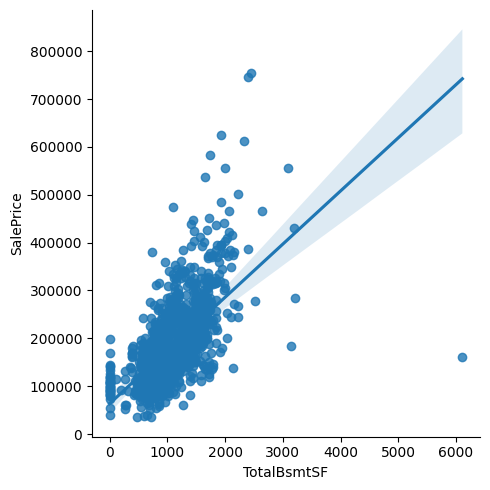

In [8]:
sns.lmplot(x='TotalBsmtSF', y="SalePrice", data=data)

In [9]:
from sklearn.metrics import mean_absolute_error as mae

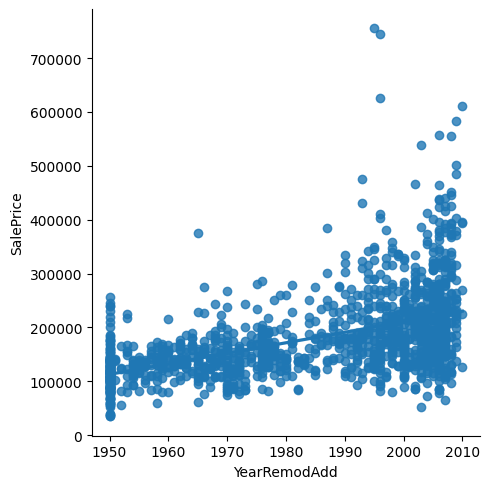

In [10]:
sns.lmplot(x= 'YearRemodAdd', y="SalePrice", data=df)

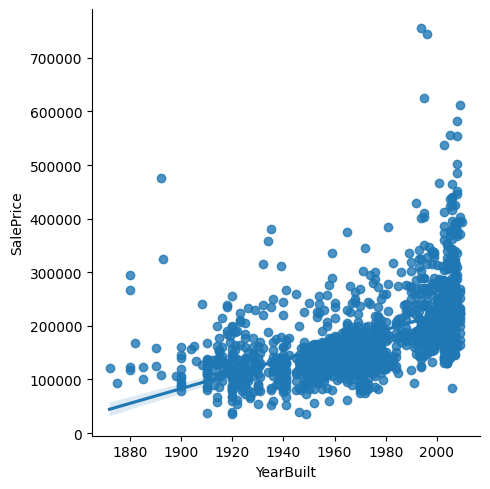

In [11]:
sns.lmplot(x='YearBuilt', y="SalePrice", data=df)

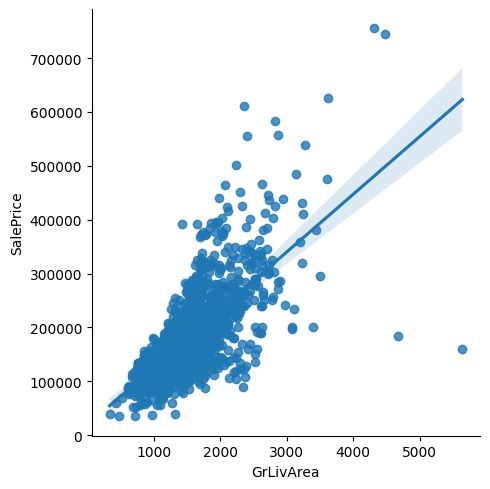

In [12]:
sns.lmplot(x='GrLivArea', y="SalePrice", data=data)

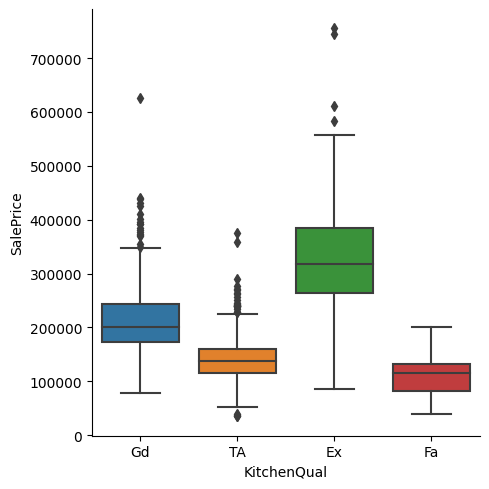

In [13]:
sns.catplot(x='KitchenQual', y="SalePrice", data=data, kind='box')

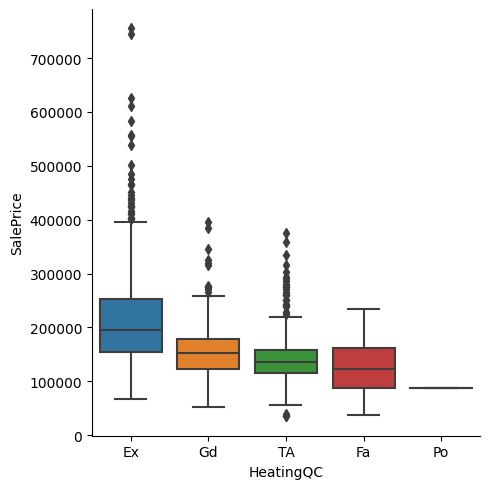

In [14]:
sns.catplot(x='HeatingQC', y="SalePrice", data=data, kind='box')

This column is obviously ordinal data, it needs to be replaced with int

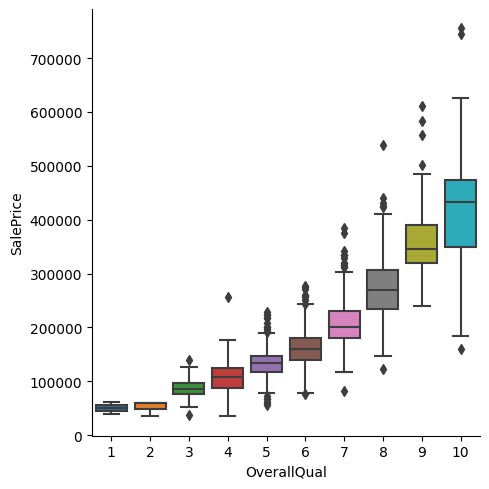

In [15]:
sns.catplot(x='OverallQual', y="SalePrice", data=data, kind='box')

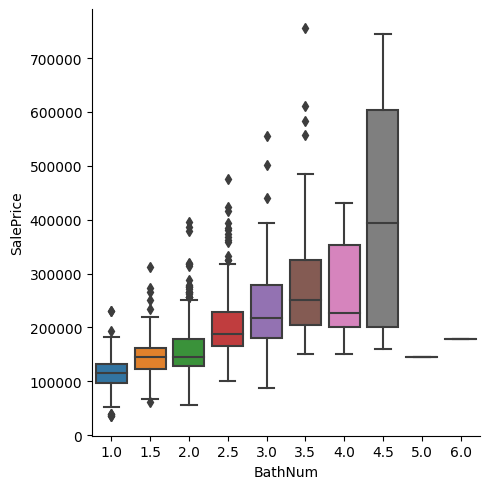

In [16]:
sns.catplot(x='BathNum', y="SalePrice", data=data, kind='box')

# Needed to Change to Ordinal Data

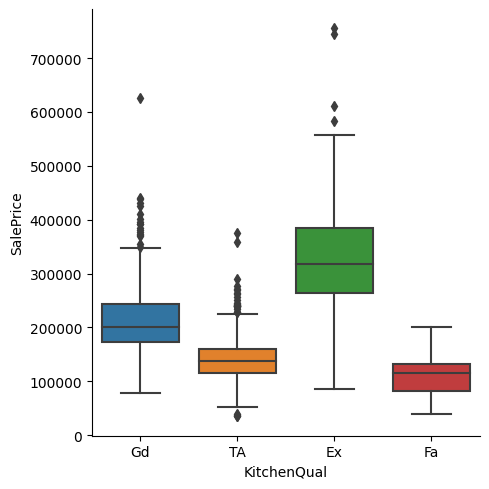

In [17]:
sns.catplot(x='KitchenQual', y="SalePrice", data=df, kind='box')

In [18]:
mapper_feat = ['KitchenQual', 'ExterQual', 'BsmtQual', ]
mapper_2_feat = ['FireplaceQu', 'HeatingQC', 'GarageQual']
mapper_3_feat = ['PoolQC']
mapper = {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3}
mapper_2 = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}


In [19]:
for feat in mapper_feat:
  df[feat] = df[feat].replace(mapper)
  test_data[feat] = test_data[feat].replace(mapper)
for feat in mapper_2_feat:
  df[feat] = df[feat].replace(mapper_2)
  test_data[feat] = test_data[feat].replace(mapper_2)

## Correlation Maps

<ipython-input-20-e7bdc7064e62>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

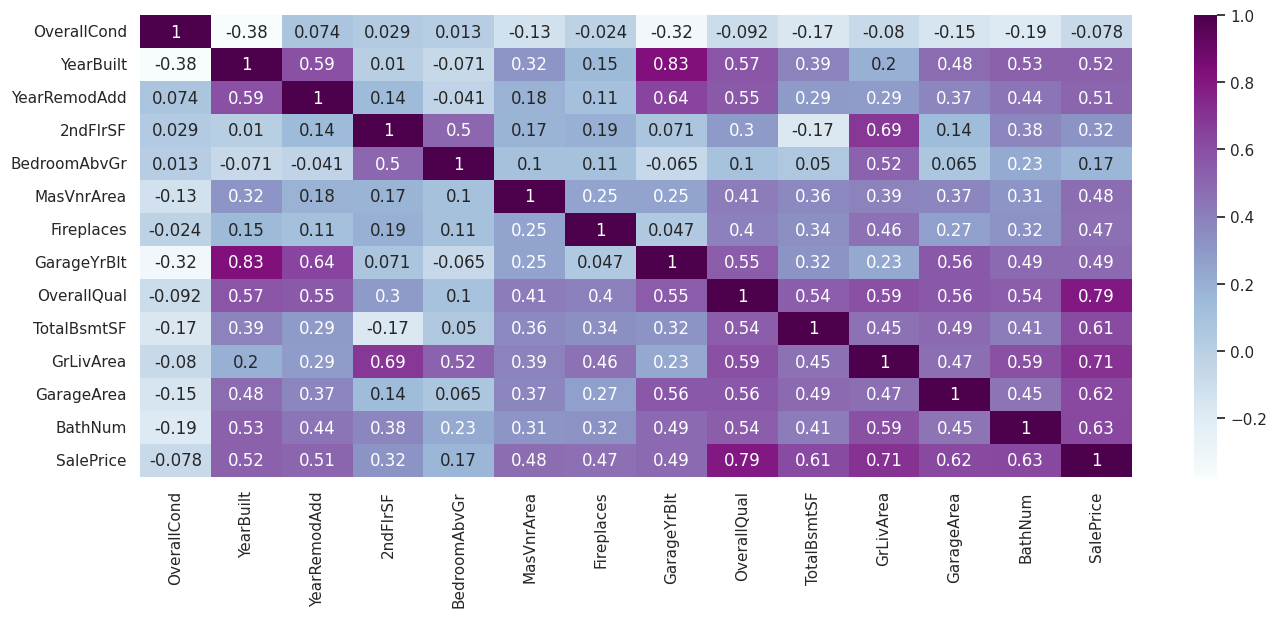

In [20]:
corr = data.corr()
plt.figure(figsize=(16, 6))
sns.set(font_scale=1.0)
sns.heatmap(corr, annot=True, cmap="BuPu")

'GrLivArea' and 'TotRmsAbvGrd' are strongly correlative, so if I delete 'TotRmsAbvGrd' I almost won't lose information

In [21]:
df = df.drop(['TotRmsAbvGrd'], axis=1)
test_data = test_data.drop(['TotRmsAbvGrd'], axis=1)

<ipython-input-22-80d5c3094039>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


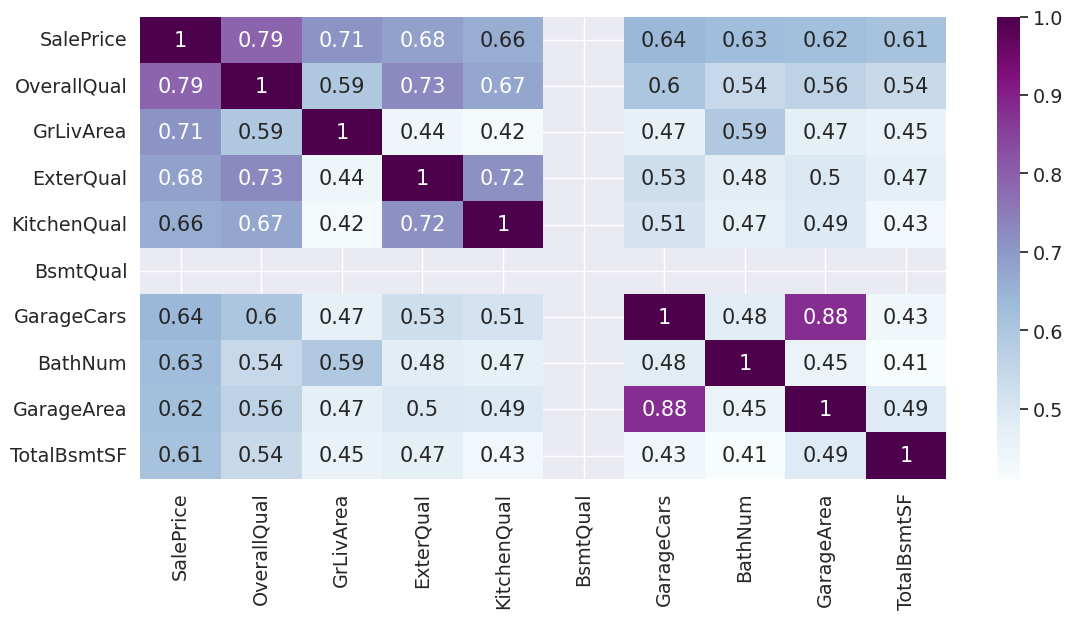

In [22]:
k = 10 #number of variables for heatmap
plt.figure(figsize=(13, 6))
corrmat = df.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols.values, xticklabels=cols.values, cmap="BuPu")

As a result, make sure that all stronfly correlative features are in good features, for example, I deleted '1stFlrSF' since it strongly correlates with 'TotalBsmtSF'. And delete 'GarageCars' from data

In [23]:
df = df.drop(['GarageCars'], axis=1)
test_data = test_data.drop(['GarageCars'], axis=1)

# Outliars

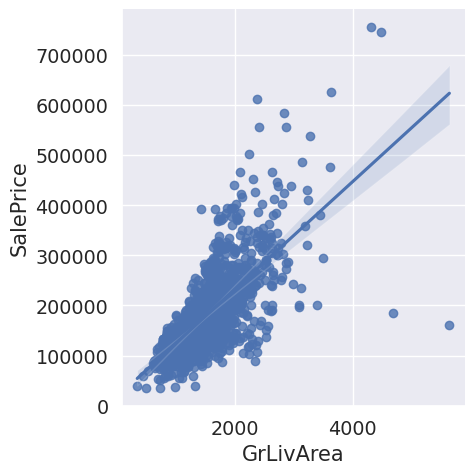

In [24]:
sns.lmplot(x='GrLivArea', y="SalePrice", data=df)

Two lowest values are far away and can be considered as outliars

In [25]:
data[(data['GrLivArea'] > 4000) & (data['SalePrice'] < 200000)]

,Condition1,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,Heating,...,Fireplaces,SaleType,GarageYrBlt,OverallQual,TotalBsmtSF,GrLivArea,GarageArea,KitchenQual,BathNum,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
524,PosN,1Fam,2Story,5,2007,2008,Hip,CompShg,Ex,GasA,...,1,New,2007.0,10,3138,4676,884,Ex,4.5,184750
1299,Feedr,1Fam,2Story,5,2008,2008,Hip,ClyTile,Ex,GasA,...,3,New,2008.0,10,6110,5642,1418,Ex,4.5,160000


In [26]:
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)].index)

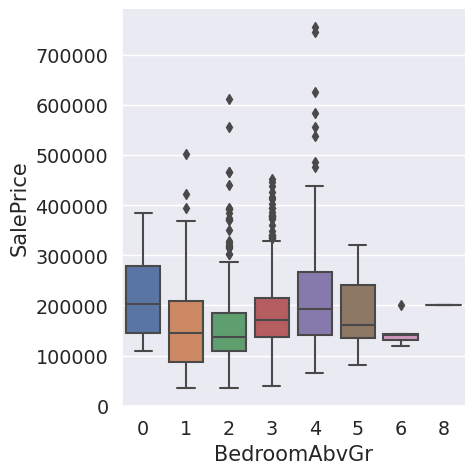

In [27]:
sns.catplot(x='BedroomAbvGr', y="SalePrice", data=data, kind='box')

In [28]:
data[data['BedroomAbvGr'] == 8]

,Condition1,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,Heating,...,Fireplaces,SaleType,GarageYrBlt,OverallQual,TotalBsmtSF,GrLivArea,GarageArea,KitchenQual,BathNum,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
636,Feedr,2fmCon,2.5Fin,7,1914,1995,Hip,CompShg,Fa,GasA,...,0,WD,NaN,6,1440,3395,0,Fa,2.0,200000


In [29]:
df = df.drop(df[df['BedroomAbvGr'] == 8].index)

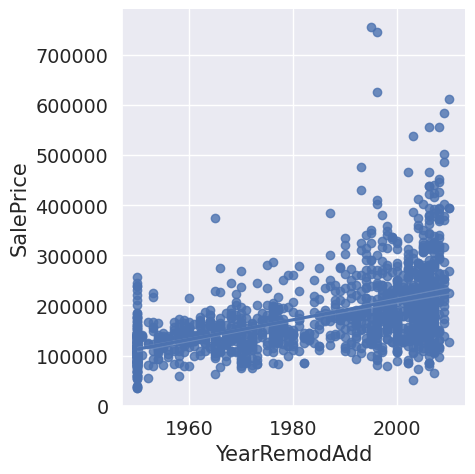

In [30]:
sns.lmplot(x='YearRemodAdd', y="SalePrice", data=df)

In [31]:
df[(df['YearRemodAdd'] > 1960) & (df['YearRemodAdd'] < 1970) & (df['SalePrice'] > 350000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BathNum,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,...,NaN,NaN,NaN,0,6,2009,WD,Normal,4.0,375000


In [32]:
df = df.drop(314, axis=0)

# Change rows that have some values and they're abcent in test dataset

In [33]:
df = df.drop(df[(df['RoofMatl'] == 'Metal') | (df['RoofMatl'] == 'Membran') | (df['RoofMatl'] == 'Roll')].index)

In [34]:
df['Fireplaces'] = np.where(df.Fireplaces == 3, 3, df.Fireplaces)
df['Fireplaces'] = np.where(df.Fireplaces == 4, 3, df.Fireplaces)
test_data['Fireplaces'] = np.where(test_data.Fireplaces == 3, 3, test_data.Fireplaces)
test_data['Fireplaces'] = np.where(test_data.Fireplaces == 4, 3, test_data.Fireplaces)

In [35]:
df['Heating'] = np.where(df.Heating == 'Floor', 'GasA', df.Heating)
df['Heating'] = np.where(df.Heating == 'OthW', 'GasA', df.Heating)

df['HouseStyle'] = np.where(df.HouseStyle == '2.5Fin', 'Fin', df.HouseStyle)
df['HouseStyle'] = np.where(df.HouseStyle == '1.5Fin', 'Fin', df.HouseStyle)
test_data['HouseStyle'] = np.where(test_data.HouseStyle == '1.5Fin', 'Fin', test_data.HouseStyle)

df['Electrical'] = np.where(df.Electrical == 'Mix', 'SBrkr', df.Electrical)

# Delete Columns that have too many missing values

In [36]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1447,99.587061
MiscFeature,1399,96.283551
Alley,1363,93.805919
Fence,1172,80.660702
FireplaceQu,688,47.350310
LotFrontage,258,17.756366
GarageQual,80,5.505850
GarageYrBlt,80,5.505850
GarageCond,80,5.505850
GarageType,80,5.505850


In [37]:
col = missing_data.index[:6]
df = df.drop(col, axis=1)
test_data = test_data.drop(col, axis=1)

## Features that needed to be changed to have normal distribiution

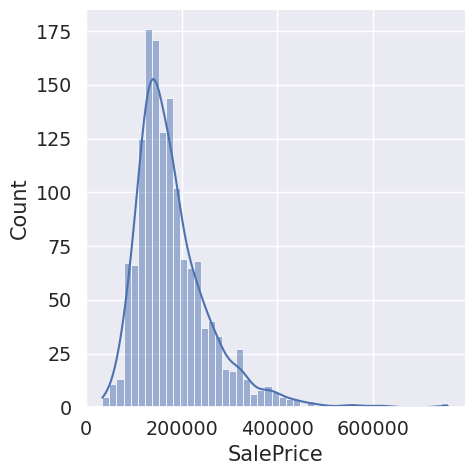

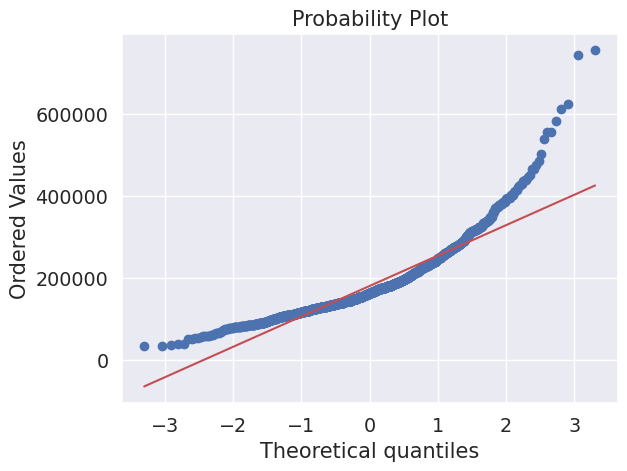

In [38]:
#histogram and normal probability plot
from scipy import stats
import matplotlib.pyplot as plt
sns.displot(df['SalePrice'], kde=True)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

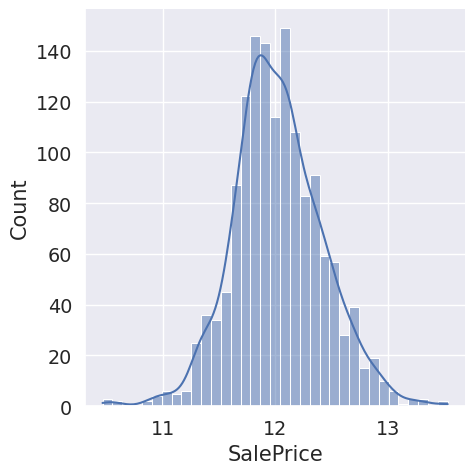

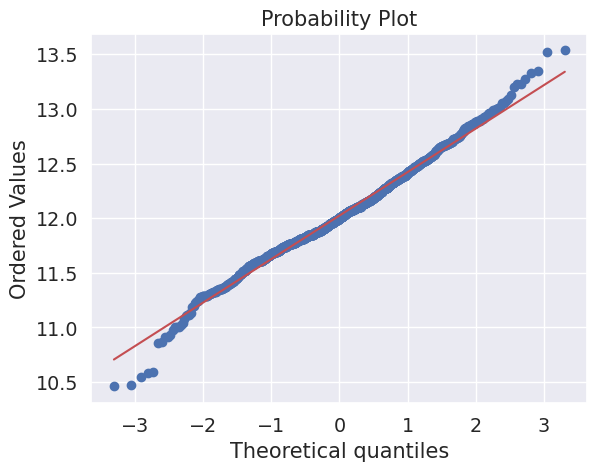

In [39]:
df["SalePrice"] = np.log(df['SalePrice'])
sns.displot(df['SalePrice'], kde=True)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

SalePrice is better with log transformation

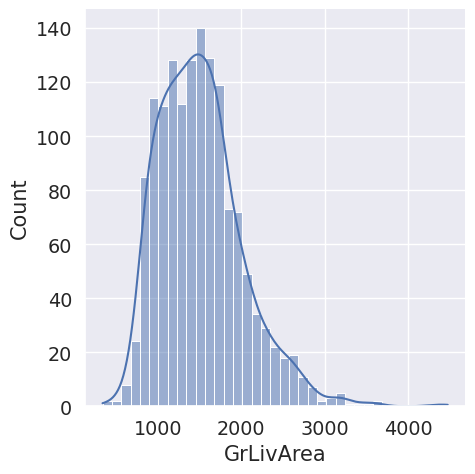

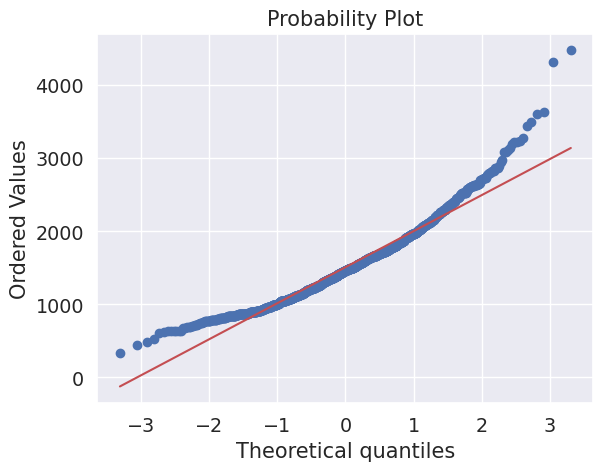

In [40]:
sns.displot(df['GrLivArea'], kde=True)
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

Make the same log transformation for other suted features

In [41]:
df['TotalBsmtSF'] = np.log1p(df['TotalBsmtSF'])
df['GrLivArea'] = np.log1p(df['GrLivArea'])
df['GarageArea'] = np.log1p(df['GarageArea'])
df['MasVnrArea'] = np.log1p(df['MasVnrArea'])


test_data['TotalBsmtSF'] = np.log1p(test_data['TotalBsmtSF'])
test_data['GrLivArea'] = np.log1p(test_data['GrLivArea'])
test_data['GarageArea'] = np.log1p(test_data['GarageArea'])
test_data['MasVnrArea'] = np.log1p(test_data['MasVnrArea'])


# Save to New csv file

In [43]:
y = df.SalePrice
df_no_y = df.drop("SalePrice", axis=1)

In [49]:
df.to_csv('chosen.csv', na_rep='N/A')

In [50]:
test_data.to_csv('chosen_test.csv', na_rep='N/A')

In [42]:
# num_chan = make_pipeline(
#     SimpleImputer(strategy="mean"), StandardScaler())
# cat_chan = make_pipeline(
#     SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown="ignore"))

# num_chan_tree = SimpleImputer(strategy="mean")
# cat_chan_tree = make_pipeline(
#     SimpleImputer(strategy="most_frequent", fill_value="missing"),
#     OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),)

# linear_changer = make_column_transformer(
#     (num_chan, selector(dtype_include="number")),
#     (cat_chan, selector(dtype_include="object")),)

# tree_changer = make_column_transformer(
#     (num_chan_tree, selector(dtype_include="number")),
#     (cat_chan_tree, selector(dtype_include="object")),)